In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel('data.xlsx')
data

,recid,black,alcohol,drugs,married,felon,educ,rules,age
0,0.0,0,1,0,1,0,7,2,441
1,0.0,1,0,0,0,1,12,0,307
2,1.0,0,0,1,0,1,9,3,253
3,0.0,0,0,1,0,0,9,0,244
4,0.0,1,0,0,0,0,12,0,277
...,...,...,...,...,...,...,...,...,...
1006,NaN,0,0,0,0,0,10,0,231
1007,NaN,0,0,0,0,0,9,2,290
1008,NaN,0,0,1,0,0,12,5,236
1009,NaN,0,1,1,0,0,12,0,393


In [4]:
age_22 = []
age_30 = []
for i in data['age']:
    if (i // 12 <= 22):
        age_22.append(1)
        age_30.append(0)
    elif (i // 12 > 30):
        age_22.append(0)
        age_30.append(1)
    else:
        age_22.append(0)
        age_30.append(0)
        

In [5]:
YVar = data[['recid']]
XVar = data.drop(['recid', 'age'], axis=1)
XVar['age_22'] = age_22
XVar['age_30'] = age_30
XVar


,black,alcohol,drugs,married,felon,educ,rules,age_22,age_30
0,0,1,0,1,0,7,2,0,1
1,1,0,0,0,1,12,0,0,0
2,0,0,1,0,1,9,3,1,0
3,0,0,1,0,0,9,0,1,0
4,1,0,0,0,0,12,0,0,0
...,...,...,...,...,...,...,...,...,...
1006,0,0,0,0,0,10,0,1,0
1007,0,0,0,0,0,9,2,0,0
1008,0,0,1,0,0,12,5,1,0
1009,0,1,1,0,0,12,0,0,1


In [6]:
# OLS

linearModel = sm.OLS(YVar, XVar, missing='drop').fit()
print(linearModel.summary())
yhat1 = linearModel.predict(XVar)
print('Predicted recidive\n', yhat1)

                                 OLS Regression Results                                
Dep. Variable:                  recid   R-squared (uncentered):                   0.399
Model:                            OLS   Adj. R-squared (uncentered):              0.393
Method:                 Least Squares   F-statistic:                              70.21
Date:                Tue, 13 Jun 2023   Prob (F-statistic):                    4.83e-99
Time:                        14:50:24   Log-Likelihood:                         -649.86
No. Observations:                 961   AIC:                                      1318.
Df Residuals:                     952   BIC:                                      1362.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [7]:
# LOGIT

logitModel = sm.Logit(YVar, XVar, missing='drop').fit()
print(logitModel.summary())
print(logitModel.cov_params())
yhat2 = logitModel.predict(XVar)
print('\nPredicted recidive\n', yhat2, '\n\n')

# NO REGRESSORS

Xconst = YVar.drop(['recid'], axis=1)
Xconst = sm.add_constant(Xconst)
const_model = sm.Logit(YVar, Xconst, missing='drop').fit()
print(const_model.summary())

Optimization terminated successfully.
         Current function value: 0.637887
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  recid   No. Observations:                  961
Model:                          Logit   Df Residuals:                      952
Method:                           MLE   Df Model:                            8
Date:                Tue, 13 Jun 2023   Pseudo R-squ.:                 0.03704
Time:                        14:50:25   Log-Likelihood:                -613.01
converged:                       True   LL-Null:                       -636.59
Covariance Type:            nonrobust   LLR p-value:                 1.433e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
black          0.5539      0.139      3.987      0.000       0.282       0.826
alcohol        0.3971      0.

In [13]:
# PROBIT

probitModel = sm.Probit(YVar, XVar, missing='drop').fit()
print(probitModel.summary())
yhat3 = probitModel.predict(XVar)
print('Predicted recidive\n', yhat3)


Optimization terminated successfully.
         Current function value: 0.638014
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                  recid   No. Observations:                  961
Model:                         Probit   Df Residuals:                      952
Method:                           MLE   Df Model:                            8
Date:                Tue, 13 Jun 2023   Pseudo R-squ.:                 0.03684
Time:                        15:01:44   Log-Likelihood:                -613.13
converged:                       True   LL-Null:                       -636.59
Covariance Type:            nonrobust   LLR p-value:                 1.595e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
black          0.3430      0.085      4.039      0.000       0.177       0.509
alcohol        0.2443      0.

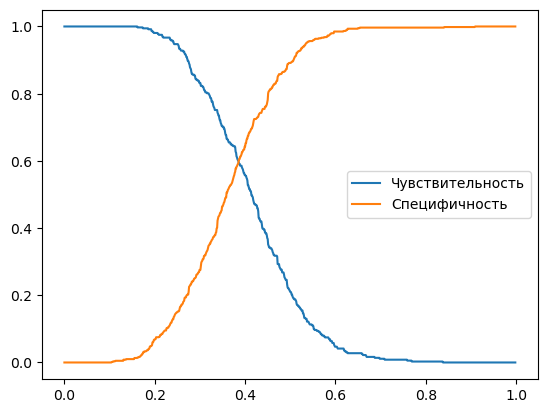

In [14]:
# P(low_i=1)>c

c = []
yhat = []
for i in range(999):
    c.append(i / 1000)
    yhat_i = []
    for j in range(961):
        if (yhat3[j] > c[i]):
            yhat_i.append(1)
        else:
            yhat_i.append(0)
    yhat.append(yhat_i)
    
metric1 = []
metric2 = []
for i in range(999):
    count1 = 0
    count2 = 0
    count_ones = 0
    count_zeroes = 0
    for j in range(961):
        if (data['recid'][j] == 1):
            count_ones += 1
            if (data['recid'][j] == yhat[i][j]):
                count1 += 1
        else:
            count_zeroes += 1
            if (data['recid'][j] == yhat[i][j]):
                count2 += 1
    metric1.append(count1/count_ones)
    metric2.append(count2/count_zeroes)
plt.plot(c, metric1)
plt.plot(c, metric2)
plt.legend(['Чувствительность', 'Специфичность'])

(1.0, 0.353, 0.4757929883138564)

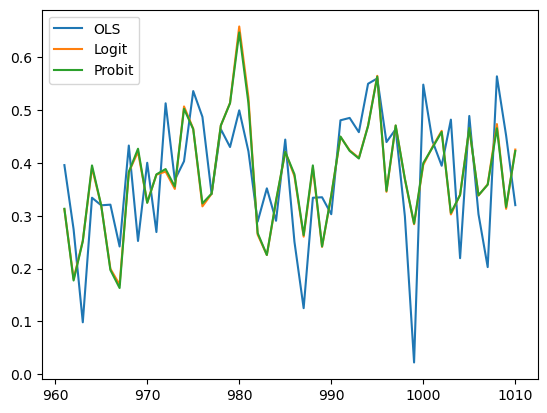

In [15]:
m1 = max(metric1)
m2 = max(metric2)
c_i = 0
k = 0
for i in range(999):
    if (metric1[i] < 0.7):
        k = i
        c_i = i / 1000
        break
plt.plot(yhat1[-50:])
plt.plot(yhat2[-50:])
plt.plot(yhat3[-50:])
plt.legend(['OLS', 'Logit', 'Probit'])
m1,c_i,metric2[k]

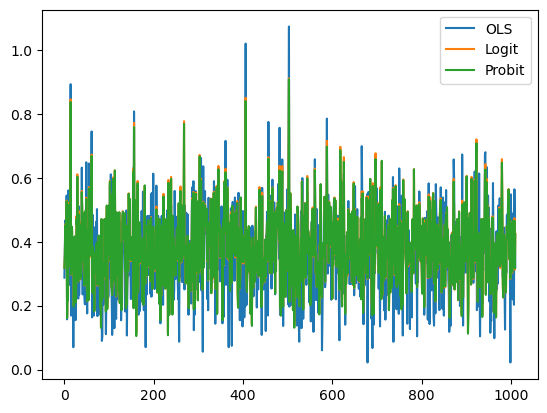

In [18]:
plt.plot(yhat1)
plt.plot(yhat2)
plt.plot(yhat3)
plt.legend(['OLS', 'Logit', 'Probit'])

In [16]:
# max in new data

m = max(yhat2[-50:])
k = 0
for i in range(960, 1011):
    if (yhat2[i] == m):
        k = i
        break
m, k

(0.6585270963176593, 980)

In [17]:
# in all data

attention = []
m = 0
max_i = -1
for i in range(961):
    if (data['recid'][i] < 1 and yhat2[i] >= 0.5):
        attention.append(i)
        if (yhat2[i] >= m ):
            m = yhat2[i]
            max_i = i
print(attention)
m, i

[5, 9, 10, 39, 100, 102, 110, 113, 144, 146, 158, 164, 222, 239, 263, 294, 295, 315, 328, 330, 335, 361, 376, 395, 406, 459, 463, 466, 476, 478, 479, 502, 503, 522, 532, 539, 561, 574, 591, 593, 619, 624, 626, 636, 648, 666, 677, 683, 685, 703, 708, 711, 742, 762, 783, 791, 829, 842, 857, 891, 896, 919, 943, 946, 949]


(0.9114130126717576, 960)